## Comparison of using the individual and averaged cortical activity patterns for the evaluation of a group model 


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.run_model as rm
import cortico_cereb_connectivity.globals as gl

import matplotlib.pyplot as plt

In [ ]:
# To produce an evaluation of the models, using a specific evaluation dataset
import cortico_cereb_connectivity.script.script_eval_corticalact as seh
seh.eval_models_script(eval_id = 'MDTB_Cavg',cortical_act = 'avg')
seh.eval_models_script(eval_id = 'MDTB_Cind',cortical_act = 'ind')
seh.eval_models_script(eval_id = 'MDTB_Cloo',cortical_act = 'loo')



### Summary plot 

In [ ]:
dataset_list = ['HCPur100']
models=['MDTB_Cavg','MDTB_Cind','MDTB_Cloo']
df = rm.comb_eval(models=models,methods=['L2reg'],eval_data=dataset_list,cerebellum='MNISymC3')
df.shape

(50, 33)

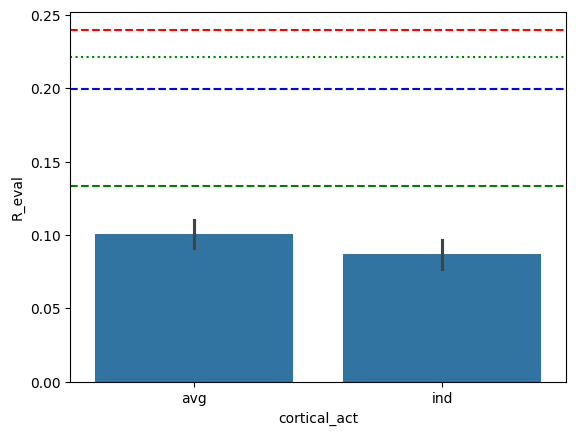

In [11]:
sns.barplot(data=df,x='cortical_act',y='R_eval')
plt.axhline(y=df[df.cortical_act=='avg'].noiseceiling_XY.mean(), color='r', linestyle='--', label='Within-subject (Y)')
plt.axhline(y=df[df.cortical_act=='ind'].noiseceiling_XY.mean(), color='b', linestyle='--', label='Within-subject (Y and Yp)')
plt.axhline(y=df[df.cortical_act=='ind'].group_noiseceil_Y_upper.mean(), color='g', linestyle=':', label='Between subjects (Y)')
plt.axhline(y=df[df.cortical_act=='ind'].group_noiseceil_Y_lower.mean(), color='g', linestyle='--', label='Between subjects (Y)')

In [5]:
df.groupby('cortical_act').noise_X_R.mean()

cortical_act
avg    0.935678
ind    0.630380
Name: noise_X_R, dtype: float64